In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
data_path = Path("../../data/raw/weather/all_regions_synthetic_weather_historical.csv")
df = pd.read_csv(data_path)

In [10]:
print("Dataset shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset shape: (5840, 20)

Data Types:
 timestamp                           object
region_name                         object
temperature_current                float64
temperature_min                    float64
temperature_max                    float64
temperature_growing_degree_days    float64
humidity_relative_humidity           int64
humidity_pressure                  float64
precipitation_rain_1h              float64
precipitation_rain_3h              float64
wind_speed                         float64
wind_gust                          float64
wind_degree                          int64
cloud_cover                          int64
weather_main                        object
weather_description                 object
extreme_weather_is_rainy              bool
extreme_weather_is_thunderstorm       bool
extreme_weather_is_clear              bool
extreme_weather_is_cloudy             bool
dtype: object

Missing Values:
 timestamp                          0
region_name                    

In [11]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        temperature_current  temperature_min  temperature_max  \
count          5840.000000      5840.000000      5840.000000   
mean             24.964954        20.015433        32.090557   
std               7.862542         6.318479         6.338168   
min              -2.900000        -2.250000         9.600000   
25%              19.780000        15.770000        27.800000   
50%              24.845000        20.000000        31.995000   
75%              30.312500        24.360000        36.362500   
max              59.090000        44.880000        54.030000   

       temperature_growing_degree_days  humidity_relative_humidity  \
count                      5840.000000                 5840.000000   
mean                         15.355596                   64.355822   
std                           7.855694                   14.808064   
min                           0.000000                    7.000000   
25%                           9.800000            

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_6336\2275876824.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['temperature_current'].resample('M').mean().plot(ax=axes[0], title='Monthly Average Temperature')
C:\Users\prana\AppData\Local\Temp\ipykernel_6336\2275876824.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['precipitation_rain_1h'].resample('M').sum().plot(ax=axes[1], title='Monthly Total Precipitation')
C:\Users\prana\AppData\Local\Temp\ipykernel_6336\2275876824.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['humidity_relative_humidity'].resample('M').mean().plot(ax=axes[2], title='Monthly Average Humidity')


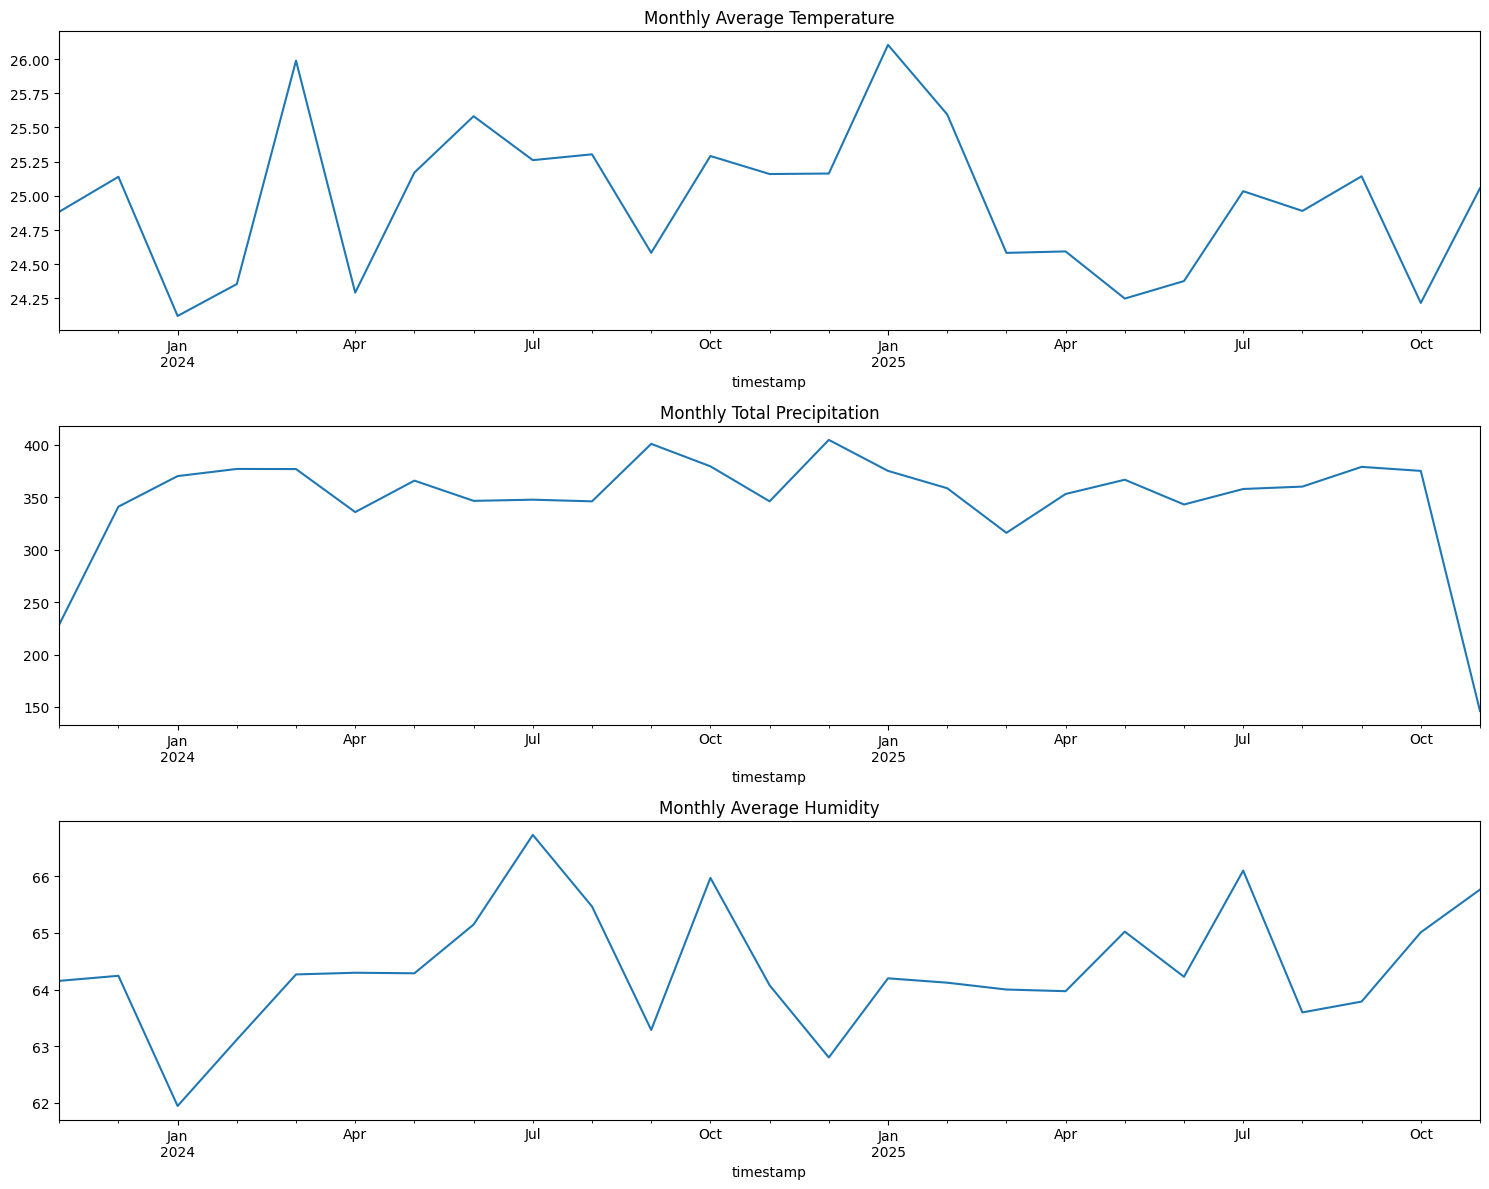

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
df['temperature_current'].resample('M').mean().plot(ax=axes[0], title='Monthly Average Temperature')
df['precipitation_rain_1h'].resample('M').sum().plot(ax=axes[1], title='Monthly Total Precipitation')
df['humidity_relative_humidity'].resample('M').mean().plot(ax=axes[2], title='Monthly Average Humidity')
plt.tight_layout()
plt.show()

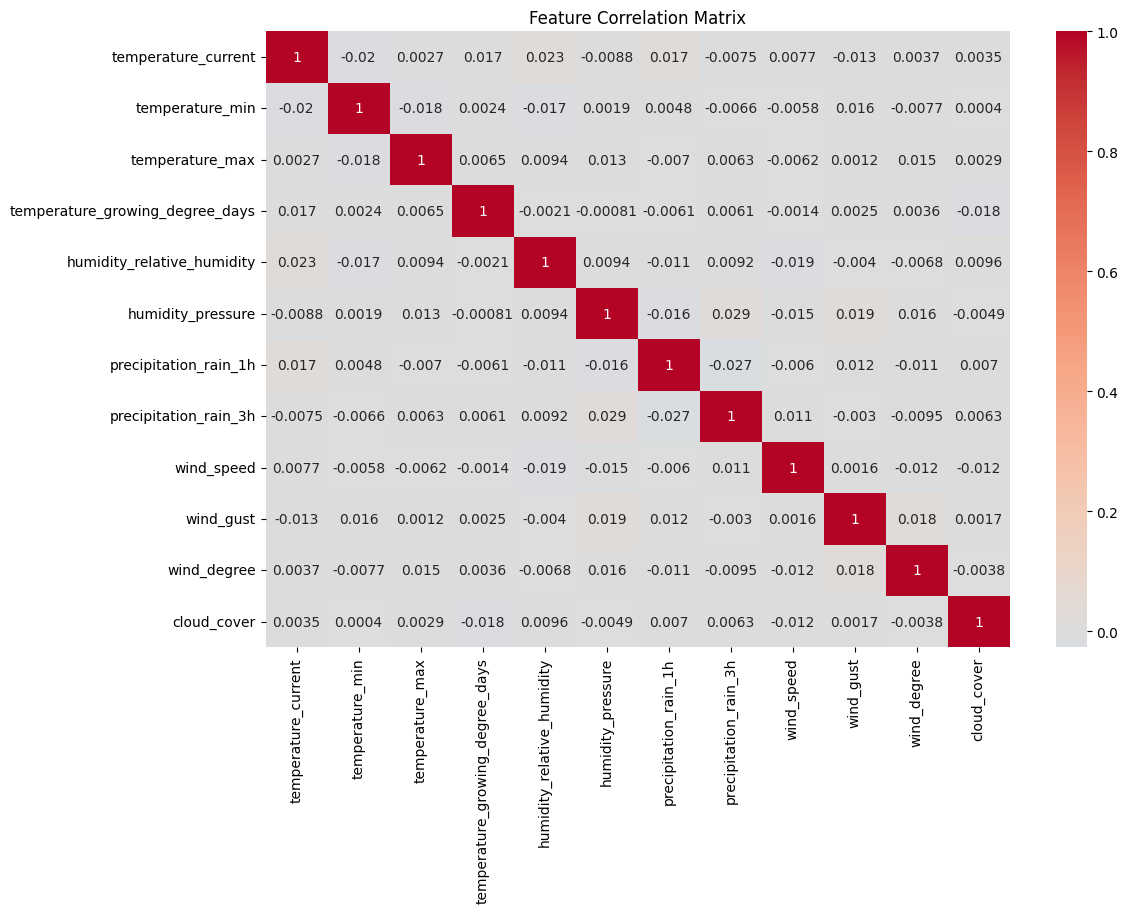

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()